In [1]:
from src import *
import matplotlib.pyplot as plt

Frames: 10001 N: 10 Unique maps: 362


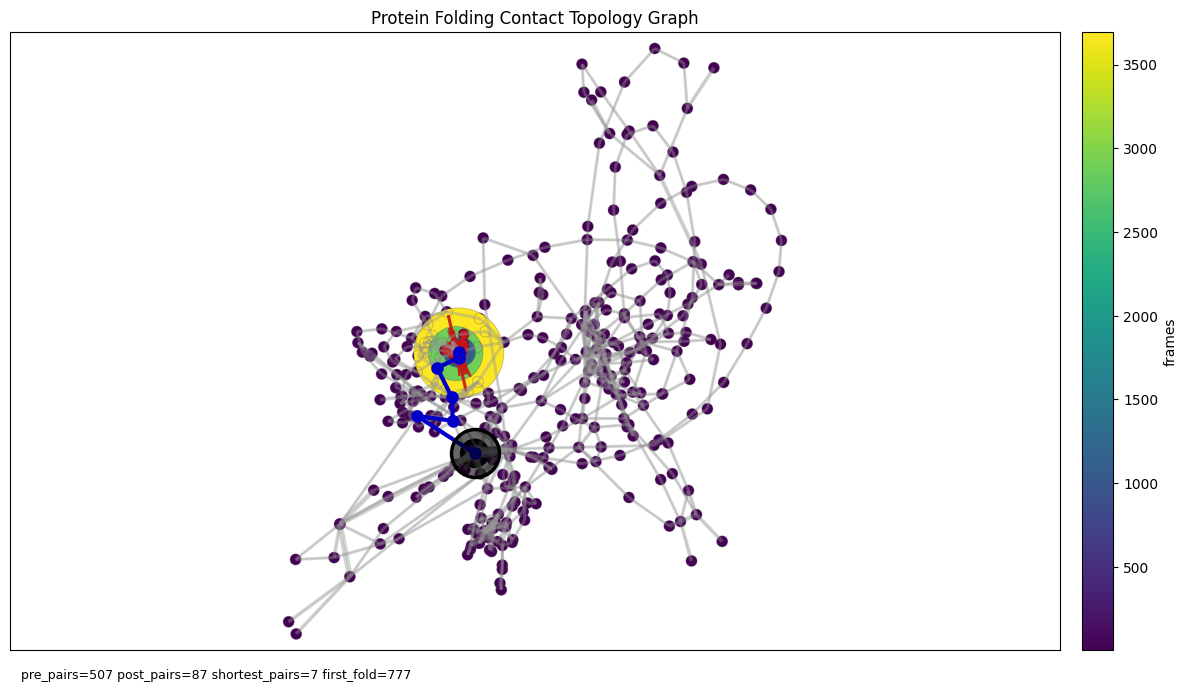

In [3]:
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

G, counter, node_counts = graphs.build_temporal_transition_graph(frame_to_uid, inds, keep_self_loops=False)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)

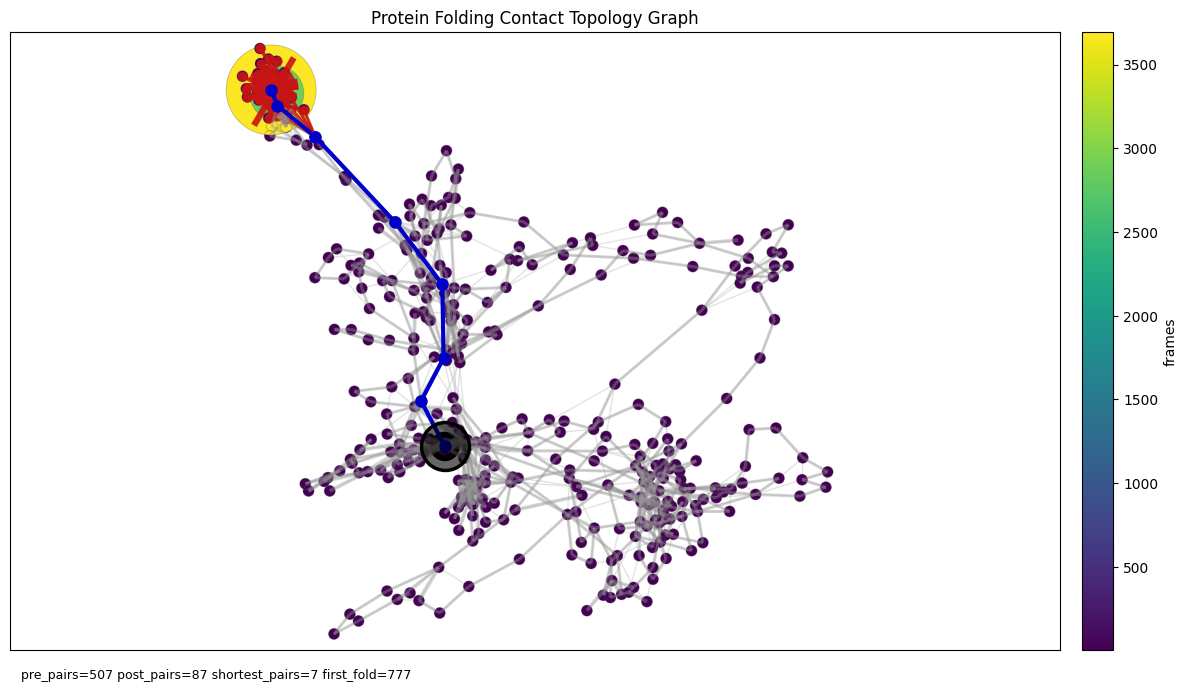

In [4]:
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)

plt.savefig("images/chignolin_temporal_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


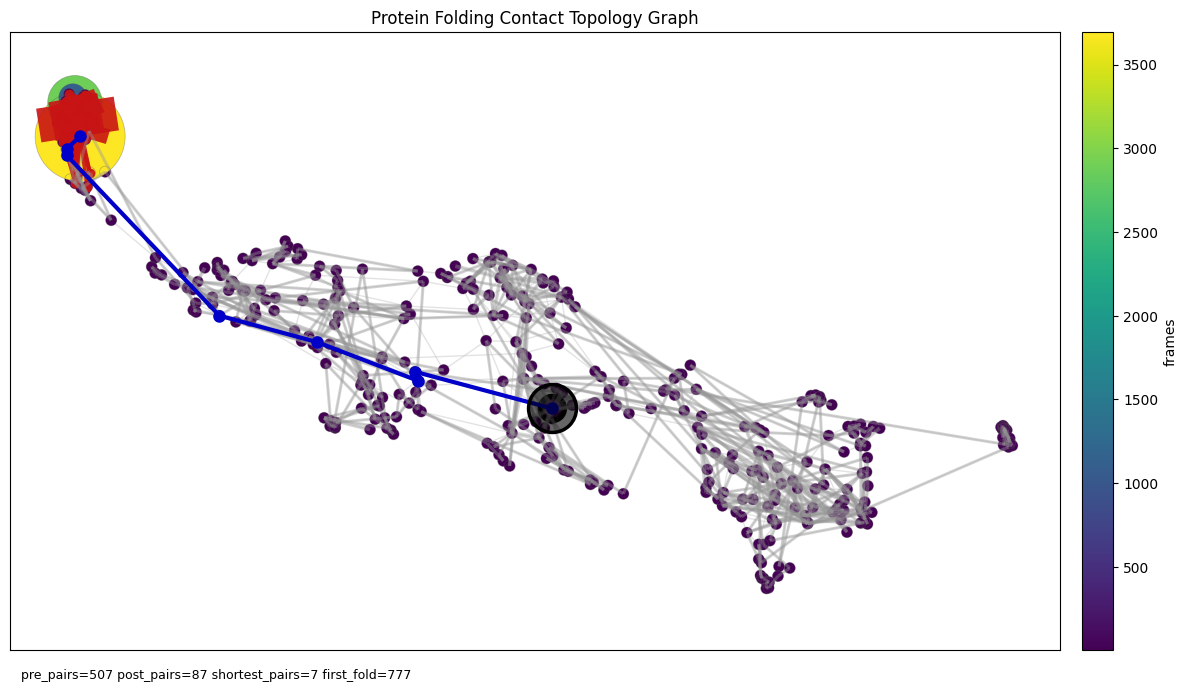

In [5]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)

def embed_flat_bits(flat_bits, method='umap', n_components=2, n_neighbors=15, random_state=42):
    """
    embed flat_bits (U, Mbits) -> X_emb (U,2)
    Prefer UMAP if available, else Isomap, else SpectralEmbedding, else PCA.
    """
    U = flat_bits.shape[0]
    method = method.lower()
    X = flat_bits.astype(float)  # scikit-learn expects float arrays
    if method == 'umap' and _has_umap:
        reducer = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, random_state=random_state)
        X_emb = reducer.fit_transform(X)
        return X_emb
    if method == 'isomap':
        iso = Isomap(n_components=n_components, n_neighbors=max(5, min(n_neighbors, U-1)))
        X_emb = iso.fit_transform(X)
        return X_emb
    if method == 'spectral':
        sp = SpectralEmbedding(n_components=n_components, n_neighbors=max(5, min(n_neighbors, U-1)))
        X_emb = sp.fit_transform(X)
        return X_emb
    # fallback PCA for extreme cases
    pca = PCA(n_components=n_components, random_state=random_state)
    X_emb = pca.fit_transform(X)
    return X_emb

_has_umap = True
import umap
X_emb = embed_flat_bits(flat_bits, method='umap', n_neighbors=15)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)

plt.savefig("images/chignolin_original_manifold_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


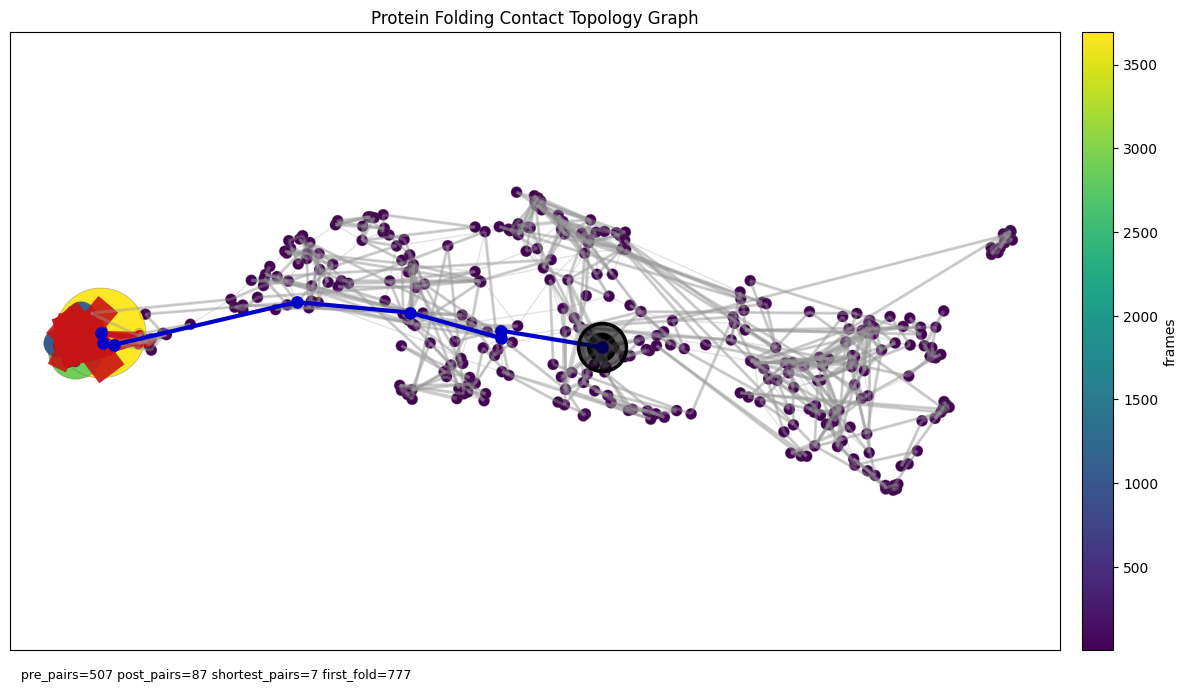

In [6]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=45, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)
plt.savefig("images/chignolin_manifold_pca_45_umap_2_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


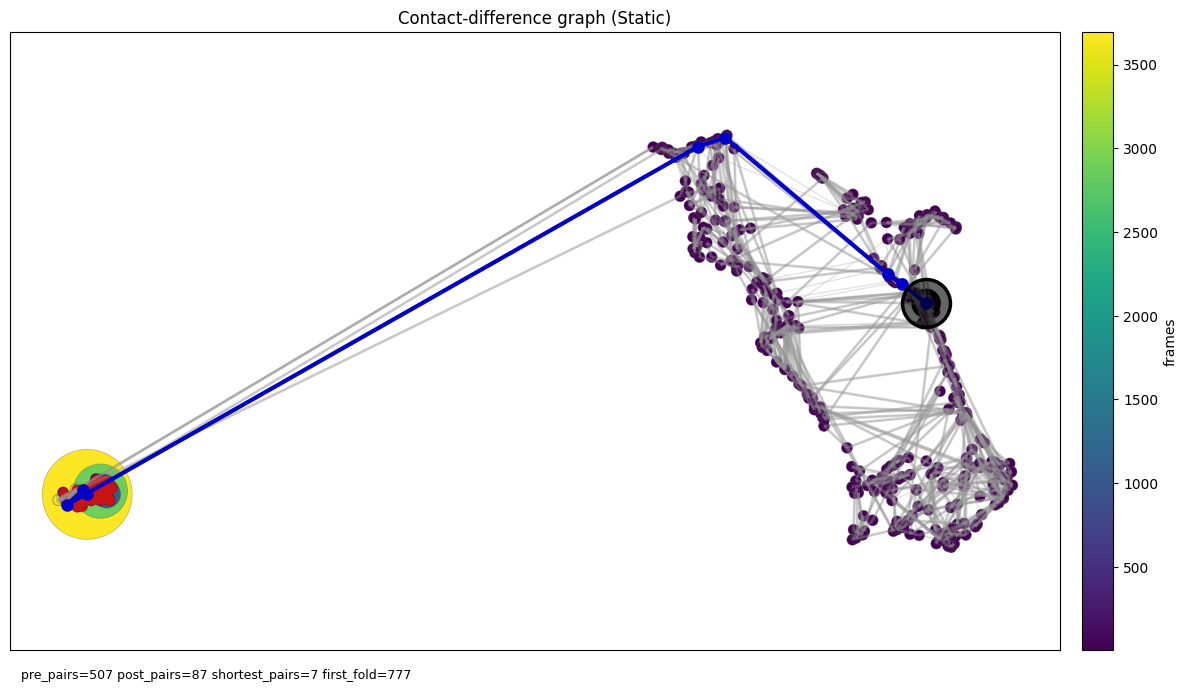

In [ ]:
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=5, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)
plt.savefig("images/chignolin_manifold_pca_5_umap_2_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/skl

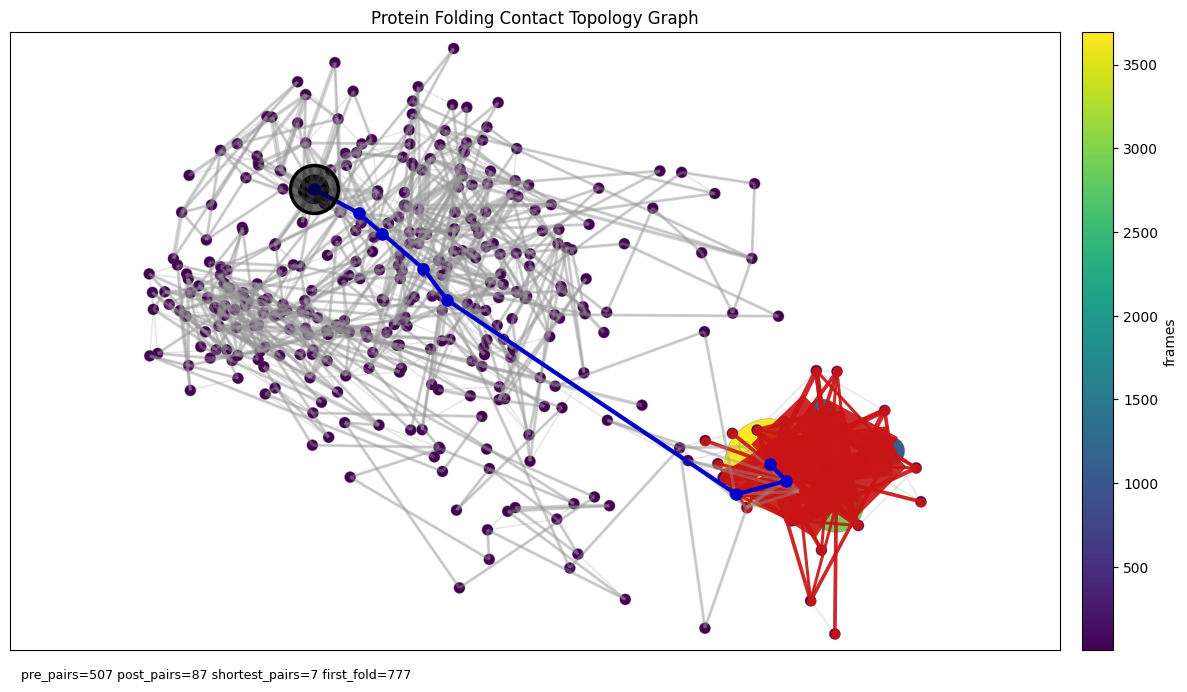

In [7]:
X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False, count_multiplicity=True)
plt.savefig("images/chignolin_true_manifold_graph.png")

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/skl

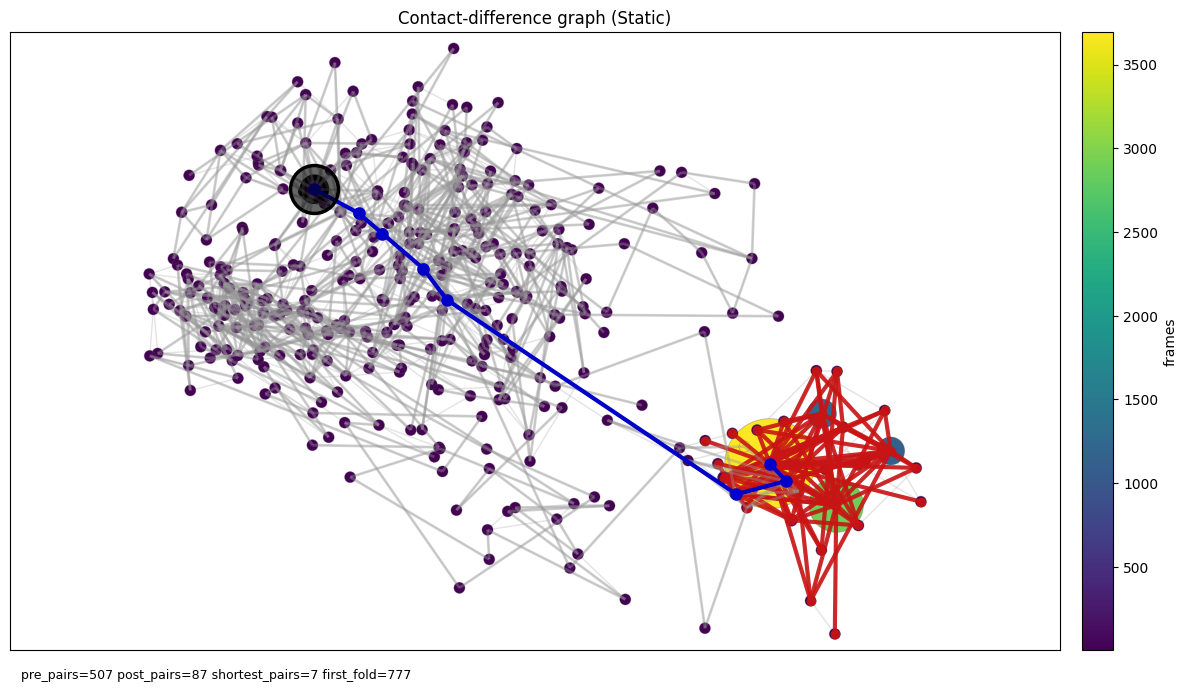

In [11]:
from collections import Counter
import networkx as nx

def expand_seq_to_edge(G, node_seq, expand_jumps=True):
    """
    Convert a compressed node sequence into a Counter of manifold edges.
    Counts multiplicity of temporal usage.
    
    Returns:
        Counter mapping (u,v) with u<=v -> count
    """
    counts = Counter()

    for i in range(len(node_seq) - 1):
        a = int(node_seq[i])
        b = int(node_seq[i + 1])
        if a == b:
            continue

        # direct edge
        if G.has_edge(a, b) or G.has_edge(b, a):
            key = tuple(sorted((a, b)))
            counts[key] += 1
            continue

        # expand jump via shortest path
        if expand_jumps:
            try:
                path = nx.shortest_path(G, source=a, target=b)
            except nx.NetworkXNoPath:
                continue

            for j in range(len(path) - 1):
                u = int(path[j])
                v = int(path[j + 1])
                key = tuple(sorted((u, v)))
                counts[key] += 1

    return counts

X_emb, labels, D = clustering.embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)
plt.savefig("images/chignolin_true_manifold_graph.png")

In [10]:
import networkx as nx
import numpy as np

map_uid = frame_to_uid
F = len(map_uid)
frame_counts = plotting.ensure_frame_counts(G, map_uid)

start_node = int(map_uid[0]) if 0 <= 0 < F else int(map_uid[0])
folded_node = int(np.argmax(frame_counts))

# Assuming G is your merged graph and shortest_nodes is the path
shortest_nodes = nx.shortest_path(G, source=start_node, target=folded_node)

max_dist = 0
long_edge = None

for i in range(len(shortest_nodes)-1):
    u, v = shortest_nodes[i], shortest_nodes[i+1]
    
    # Calculate visual distance (Euclidean distance on the plot)
    pos_u = np.array(pos[u])
    pos_v = np.array(pos[v])
    visual_dist = np.linalg.norm(pos_u - pos_v)
    
    # Calculate physical distance (Hamming)
    # If using 'ints' from previous steps:
    # val_u, val_v = ints[u], ints[v]
    # hamming_dist = (val_u ^ val_v).bit_count() 
    
    # Or just check graph weight if stored:
    # weight = G[u][v].get('weight', 1) 
    
    print(f"Edge {u}->{v}: Visual Length={visual_dist:.2f}")

    if visual_dist > max_dist:
        max_dist = visual_dist
        long_edge = (u, v)

print(f"\nLongest visual edge is {long_edge}. Likely a Manifold Edge (Hamming=1).")

Edge 0->5: Visual Length=0.87
Edge 5->216: Visual Length=0.53
Edge 216->295: Visual Length=0.93
Edge 295->228: Visual Length=0.67
Edge 228->332: Visual Length=6.00
Edge 332->334: Visual Length=0.89
Edge 334->337: Visual Length=0.41

Longest visual edge is (228, 332). Likely a Manifold Edge (Hamming=1).


In [13]:
# Assuming 'ints' is your list of integer contact maps
# and Mbits is the total number of bits (contacts)

val_228 = ints[228]
val_332 = ints[332]

# XOR finds the bit that is different
diff = val_228 ^ val_332

# Find which bit position it is (0 to Mbits-1)
bit_pos = diff.bit_length() - 1

print(f"The Wormhole is Bit #{bit_pos}")
print(f"Node 228 has bit {bit_pos}: {'YES' if (val_228 & (1<<bit_pos)) else 'NO'}")
print(f"Node 332 has bit {bit_pos}: {'YES' if (val_332 & (1<<bit_pos)) else 'NO'}")

The Wormhole is Bit #22
Node 228 has bit 22: NO
Node 332 has bit 22: YES


In [16]:
import numpy as np

def get_residue_pair_from_bit(bit_index, n_residues=None, total_bits=None):
    """
    Converts a flat bit index back to (i, j) residue coordinates 
    assuming standard upper-triangle flattening (row-major).
    
    Args:
        bit_index (int): The index of the bit (e.g. 22).
        n_residues (int): The number of residues/beads in the protein.
                          If None, calculated from total_bits.
        total_bits (int): Total length of the bit vector (Mbits).
                          Used to calculate n_residues if not provided.
    """
    # 1. Calculate N if not provided
    if n_residues is None:
        if total_bits is None:
            raise ValueError("Must provide either n_residues or total_bits")
        # Inverse of L = N(N-1)/2  -->  N^2 - N - 2L = 0
        # N = (1 + sqrt(1 + 8L)) / 2
        n_residues = int((1 + np.sqrt(1 + 8 * total_bits)) / 2)

    # 2. Find the pair (i, j)
    # We iterate rows. Row i has (N - 1 - i) elements.
    current_idx = bit_index
    for i in range(n_residues):
        row_length = (n_residues - 1) - i
        if current_idx < row_length:
            # Found the row! The column is just the offset + (i + 1)
            j = i + 1 + current_idx
            return (i, j)
        current_idx -= row_length
        
    raise ValueError(f"Bit index {bit_index} out of bounds for N={n_residues}")

# --- USAGE EXAMPLE ---

# Example: If your "Wormhole" was Bit #22
bit_idx = 22

# You need to know EITHER the number of residues OR the total bits (Mbits)
# Let's say your protein has 100 residues
res_pair = get_residue_pair_from_bit(bit_idx, n_residues=10)

print(f"Bit #{bit_idx} corresponds to residue pair: {res_pair}")
# For N=100, Row 0 has 99 items (indices 0-98). 
# So Bit 22 is simply pair (0, 23) (since 0+1+22 = 23).

Bit #22 corresponds to residue pair: (2, 8)


In [ ]:
import py3Dmol

def view_wormhole_contact(pdb_file, res_index_a, res_index_b, offset=1):
    """
    Visualizes a specific contact pair on a protein structure.
    
    Args:
        pdb_file (str): Path to your PDB file (or PDB ID).
        res_index_a (int): 0-based index of first residue (from your calculation).
        res_index_b (int): 0-based index of second residue.
        offset (int): conversion from 0-based array to PDB numbering (usually 1).
    """
    
    # Convert 0-based indices to PDB IDs
    pdb_res_a = res_index_a + offset
    pdb_res_b = res_index_b + offset
    
    # Selection string for py3Dmol (e.g., "3,9")
    sel_str = f"{pdb_res_a},{pdb_res_b}"
    
    print(f"Visualizing Python indices {res_index_a} & {res_index_b}")
    print(f"Mapping to PDB Residue IDs {pdb_res_a} & {pdb_res_b}")

    # Initialize Viewer
    view = py3Dmol.view(width=800, height=600)
    
    # Load Data
    # If using a local file, read it into a string
    try:
        with open(pdb_file, 'r') as f:
            pdb_data = f.read()
        view.addModel(pdb_data, 'pdb')
    except FileNotFoundError:
        print(f"File {pdb_file} not found. Trying as PDB ID...")
        view.addModel(pdb_file, 'pdb') # Try loading as simple ID if file fails
        
    # 1. Base Style: Cartoon (White/Grey or Spectrum)
    # We make it translucent (opacity 0.7) so the sticks pop out more
    view.setStyle({'cartoon': {'color': 'white', 'opacity': 0.8}})
    
    # 2. Highlight Style: Sticks for the specific pair
    # We select ONLY the two residues involved
    view.addStyle({'resi': [pdb_res_a, pdb_res_b]}, 
                  {'stick': {'colorscheme': 'redCarbon', 'radius': 0.3}})
    
    # 3. Label the residues (Optional but helpful)
    view.addLabel(f"Res {pdb_res_a}", {'fontSize':12, 'fontColor':'black', 'backgroundColor':'white'}, 
                  {'resi': pdb_res_a})
    view.addLabel(f"Res {pdb_res_b}", {'fontSize':12, 'fontColor':'black', 'backgroundColor':'white'}, 
                  {'resi': pdb_res_b})

    # Zoom to center
    view.zoomTo()
    
    # Show
    return view

# --- RUN THE VISUALIZATION ---

# 1. Set the residues you found (0-based)
res1 = 2
res2 = 8
# 2. Run the viewer
# Replace 'structure.pdb' with your actual filename
view = view_wormhole_contact(pdb, res1, res2, offset=1)
view.show()

Visualizing Python indices 2 & 8
Mapping to PDB Residue IDs 3 & 9


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
import py3Dmol

# 1. Set the residues you found (0-based)
res1 = 2
res2 = 8
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/5awl.pdb"
# 2. Run the viewer
# Replace 'structure.pdb' with your actual filename
view = view_wormhole_contact(pdb, res1, res2, offset=1)
view.show()

Visualizing Python indices 2 & 8
Mapping to PDB Residue IDs 3 & 9


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
import mdtraj as md

# 1. Get the representative frame index for Node 228
# (Assuming you have your 'unique_indices' or similar mapping)
frame_idx = inds[228]
print(f"Node 228 represents Frame #{frame_idx} of the simulation.")

# 2. Load JUST that frame
# Replace 'trajectory.xtc' and 'topology.pdb' with your files
traj_228 = md.load_frame(xtc, index=frame_idx, top=pdb)

# 3. Measure the distance between Res 2 and Res 8 in THIS frame
# Note: MDTraj uses 0-based indexing
pairs = [[2, 8]]
dist_228 = md.compute_contacts(traj_228, contacts=pairs)[0][0]

print(f"Distance in Node 228: {dist_228[0]*10:.2f} Angstroms") # x10 to convert nm to Angstrom

# SAME FOR 332
frame_idx = inds[332]
print(f"Node 332 represents Frame #{frame_idx} of the simulation.")
traj_332 = md.load_frame(xtc, index=frame_idx, top=pdb)

pairs = [[2, 8]]
dist_332 = md.compute_contacts(traj_332, contacts=pairs)[0][0]

print(f"Distance in Node 332: {dist_332[0]*10:.2f} Angstroms") # x10 to convert nm to Angstrom


# 4. Measure the distance in the Native PDB for comparison
native = md.load(pdb)
dist_native = md.compute_contacts(native, contacts=pairs)[0][0]

print(f"Distance in Native PDB: {dist_native[0]*10:.2f} Angstroms")

Node 228 represents Frame #600 of the simulation.
Distance in Node 228: 8.55 Angstroms
Node 332 represents Frame #763 of the simulation.
Distance in Node 332: 5.90 Angstroms
Distance in Native PDB: 5.06 Angstroms


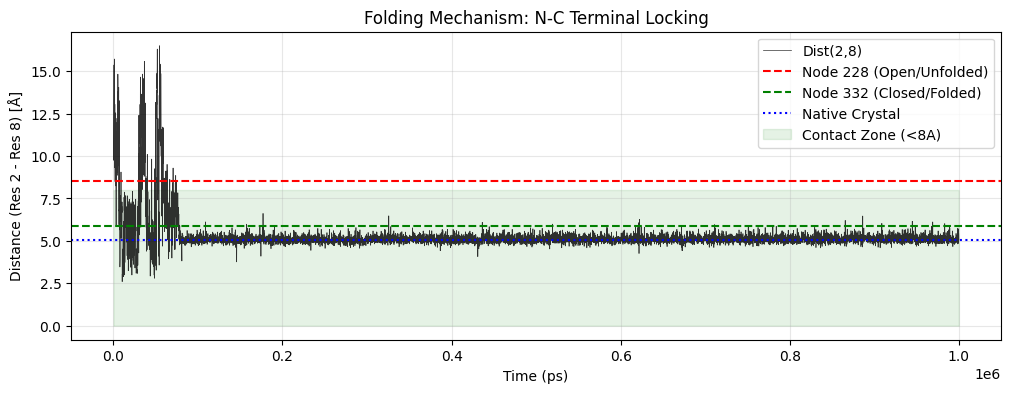

In [12]:
import mdtraj as md
import matplotlib.pyplot as plt

# 1. Load trajectory
traj = md.load(xtc, top=pdb)

# 2. Compute distance of the critical pair (2, 8)
# Note: mdtraj uses 0-based indexing
pairs = [[2, 8]]
distances = md.compute_contacts(traj, contacts=pairs)[0][:, 0] * 10  # Convert nm to Angstroms

# 3. Plot
plt.figure(figsize=(12, 4))
plt.plot(traj.time, distances, color='black', linewidth=0.5, alpha=0.8, label='Dist(2,8)')

# Add threshold lines based on your findings
plt.axhline(y=8.55, color='red', linestyle='--', label='Node 228 (Open/Unfolded)')
plt.axhline(y=5.90, color='green', linestyle='--', label='Node 332 (Closed/Folded)')
plt.axhline(y=5.06, color='blue', linestyle=':', label='Native Crystal')

# Aesthetic details
plt.fill_between(traj.time, 0, 8.0, color='green', alpha=0.1, label='Contact Zone (<8A)')
plt.xlabel("Time (ps)")
plt.ylabel("Distance (Res 2 - Res 8) [Å]")
plt.title("Folding Mechanism: N-C Terminal Locking")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.savefig("images/transition_state_contact_distance.png")
plt.show()

In [ ]:
import numpy as np
import networkx as nx

def detect_transition_edges(G, pos, shortest_path_nodes, threshold_sigma=2.0):
    """
    Identifies 'Transition Edges' defined as 1-bit steps that are 
    visually stretched significantly more than average.
    """
    # 1. Collect statistics for ALL 1-bit edges in the path
    # (or you could sample the whole graph for a baseline)
    strains = []
    edges_info = []

    for i in range(len(shortest_path_nodes) - 1):
        u = shortest_path_nodes[i]
        v = shortest_path_nodes[i+1]
        
        # Physical Distance (Hamming) - implicitly 1 for manifold edges
        # If your graph has weights, check them. Assuming unweighted or weight=1.
        physical_dist = 1.0 
        
        # Visual Distance (Euclidean)
        pos_u = np.array(pos[u])
        pos_v = np.array(pos[v])
        visual_dist = np.linalg.norm(pos_u - pos_v)
        
        # Calculate Strain
        strain = visual_dist / physical_dist
        
        strains.append(strain)
        edges_info.append((u, v, strain))

    strains = np.array(strains)
    
    # 2. Define the Baseline (Average step size)
    mean_strain = np.mean(strains)
    std_strain = np.std(strains)
    
    # 3. Identify Outliers
    print(f"Average Edge Length: {mean_strain:.3f} +/- {std_strain:.3f}")
    print("-" * 40)
    
    transition_candidates = []
    
    for u, v, strain in edges_info:
        # Check if this edge is an anomaly
        z_score = (strain - mean_strain) / std_strain if std_strain > 0 else 0
        
        if z_score > threshold_sigma:
            print(f"*** TRANSITION DETECTED ***")
            print(f"Edge {u} -> {v}")
            print(f"Visual Length: {strain:.3f} (Z-score: {z_score:.1f})")
            transition_candidates.append((u, v))
        elif strain > mean_strain:
            # Just print high-ish ones
            print(f"Edge {u} -> {v}: {strain:.3f}")
            
    return transition_candidates

# --- Usage ---
# Assuming 'G' is your merged graph and 'pos' is your 2D layout
path = nx.shortest_path(G, source=start_node, target=folded_node)
transitions = detect_transition_edges(G, pos, path)

In [6]:
'''
DESRES Q-value function
'''

import mdtraj as md
import numpy as np

def identify_native_contacts(folded_traj_or_struct, 
                             selection="name CA", 
                             min_seq_sep=7, 
                             threshold_dist_nm=1.0, 
                             occupancy_threshold=0.80):
    """
    Identifies native contacts based on the protocol:
    "Contacts between residues separated by at least 7 residues... 
    closer than 10 A (1.0 nm) for more than 80% of the time in the folded state."
    
    Parameters:
    -----------
    folded_traj_or_struct : mdtraj.Trajectory
        A trajectory of the 'folded state' (e.g., the most populated cluster) 
        OR a single native PDB structure.
    selection : str
        Atom selection query (default: C-alpha).
    min_seq_sep : int
        Minimum residue sequence separation (|i-j| >= 7).
    threshold_dist_nm : float
        Distance cutoff in nanometers (10 Angstroms = 1.0 nm).
    occupancy_threshold : float
        Fraction of frames the contact must be present (0.80). 
        If a single structure is provided, this is ignored (assumed 1.0).

    Returns:
    --------
    native_pairs : np.ndarray
        Array of shape (N, 2) containing atom indices of native contacts.
    native_dists : np.ndarray
        Array of shape (N,) containing the reference distances (r0) for these pairs.
    """
    
    # 1. Select Atoms (C-alpha)
    atom_indices = folded_traj_or_struct.topology.select(selection)
    
    # 2. Create all possible pairs satisfying sequence separation
    pairs = []
    # Map atom index back to residue index to check sequence separation
    atom_to_res = {
        atom.index: atom.residue.index 
        for atom in folded_traj_or_struct.topology.atoms 
        if atom.index in atom_indices
    }
    
    sorted_indices = sorted(list(atom_indices))
    for i in range(len(sorted_indices)):
        for j in range(i + 1, len(sorted_indices)):
            idx_i = sorted_indices[i]
            idx_j = sorted_indices[j]
            
            res_i = atom_to_res[idx_i]
            res_j = atom_to_res[idx_j]
            
            if abs(res_i - res_j) >= min_seq_sep:
                pairs.append([idx_i, idx_j])
                
    if not pairs:
        raise ValueError("No pairs found satisfying sequence separation criteria.")
        
    pairs = np.array(pairs)

    # 3. Compute distances across the provided folded trajectory/structure
    # Result shape: (n_frames, n_pairs)
    dists = md.compute_distances(folded_traj_or_struct, pairs)

    # 4. Filter by Occupancy (10 Angstroms rule)
    # Check how often dist < 1.0 nm
    is_contact = dists < threshold_dist_nm
    occupancy = np.mean(is_contact, axis=0)
    
    # Keep pairs where occupancy > 80%
    # If it's a single structure, occupancy will be 0 or 1.
    keep_mask = occupancy > occupancy_threshold
    
    native_pairs = pairs[keep_mask]
    
    # Define r0 (native distance) as the average distance in the folded ensemble
    # or the static distance if a single PDB is used.
    native_dists = np.mean(dists[:, keep_mask], axis=0)
    
    print(f"Identified {len(native_pairs)} native contacts from {len(pairs)} candidates.")
    return native_pairs, native_dists

def compute_Q(traj, native_pairs, native_dists_r0, beta=50.0, lambda_const=1.2):
    """
    Calculates the reaction coordinate Q(t) for a trajectory.
    
    Formula: Q(t) = (1/N) * Sum( 1 / (1 + exp(beta * (r(t) - lambda * r0))) )
    
    Parameters:
    -----------
    traj : mdtraj.Trajectory
        The simulation trajectory to analyze.
    native_pairs : np.ndarray
        Indices of native contacts (from identify_native_contacts).
    native_dists_r0 : np.ndarray
        Reference distances (r0) for the native pairs.
    beta : float
        Smoothing parameter in nm^-1. Default 50 nm^-1 (approx 5 Angstrom^-1).
    lambda_const : float
        Tolerance factor. Default 1.2. 
        (Contact is 'formed' if dist is within ~1.2x of native dist).

    Returns:
    --------
    Q : np.ndarray
        Array of Q values for each frame in the trajectory (0.0 to 1.0).
    """
    
    if len(native_pairs) == 0:
        return np.zeros(traj.n_frames)

    # 1. Compute distances for the native pairs in the new trajectory
    # Shape: (n_frames, n_contacts)
    r_t = md.compute_distances(traj, native_pairs)
    
    # 2. Calculate the sigmoid argument: beta * (r(t) - lambda * r0)
    # native_dists_r0 must be broadcasted to match n_frames
    val = beta * (r_t - lambda_const * native_dists_r0)
    
    # 3. Apply Sigmoid
    # Q_ij = 1 / (1 + exp(val))
    Q_ij = 1.0 / (1.0 + np.exp(val))
    
    # 4. Average over all contacts for each frame
    Q_t = np.mean(Q_ij, axis=1)
    
    return Q_t

native_struct = md.load("/Users/kebl8116-admin/Projects/origami/data/Chignolin/5awl.pdb")
        
# 2. Identify Contacts
# Note: If you have a trajectory of the folded state, pass that instead of 'native_struct'
# to strictly adhere to the " > 80% time" rule.
pairs, r0 = identify_native_contacts(native_struct)

# 3. Load Simulation Trajectory
pdb = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/Chignolin/xtc/nvt_prod_1_protein.xtc"
traj = md.load(xtc, top=pdb)

# 4. Calculate Q
q_values = compute_Q(traj, pairs, r0)

print(f"Computed Q for {traj.n_frames} frames.")
print(f"Mean Q: {np.mean(q_values):.4f}")


Identified 6 native contacts from 6 candidates.
Computed Q for 10001 frames.
Mean Q: 0.8700


/var/folders/bd/1_0prvlx06lcc135mt668_3r0000gs/T/ipykernel_84740/2622993672.py:131: RuntimeWarning: overflow encountered in exp
  Q_ij = 1.0 / (1.0 + np.exp(val))


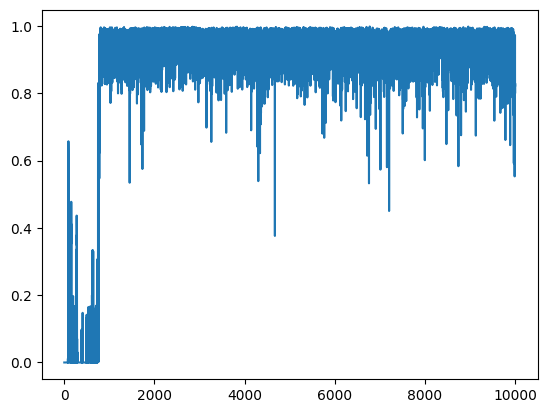

In [8]:
import matplotlib.pyplot as plt

plt.plot(q_values)

In [10]:
import numpy as np
import pandas as pd

def get_transition_paths(q_raw, time_step_ns=0.2, window_ns=10.0, 
                         q_folded=0.90, q_unfolded=0.10):
    """
    Identifies transition paths using the dual-cutoff method from 
    Lindorff-Larsen et al. (Science 2011).

    Parameters:
    -----------
    q_raw : np.ndarray
        The raw Q(t) values calculated for each frame (0.0 to 1.0).
    time_step_ns : float
        The time elapsed between frames in nanoseconds.
    window_ns : float
        The smoothing window size in nanoseconds (Default: 10 ns).
    q_folded : float
        Threshold for folded state (Default: > 0.90).
    q_unfolded : float
        Threshold for unfolded state (Default: < 0.10).

    Returns:
    --------
    transitions : list of dict
        A list of dictionaries, where each dict represents a transition event:
        {
            'type': 'folding' or 'unfolding',
            'start_frame': int,
            'end_frame': int,
            'duration_ns': float
        }
    q_smoothed : np.ndarray
        The smoothed trajectory used for the analysis.
    """

    # 1. Apply Smoothing (Running Average)
    # Convert window time to number of frames (must be odd integer ideally)
    window_frames = int(window_ns / time_step_ns)
    if window_frames < 1: 
        window_frames = 1
        
    # Use pandas for easy rolling average; center=True avoids phase shift
    q_series = pd.Series(q_raw)
    q_smooth = q_series.rolling(window=window_frames, center=True).mean().fillna(q_series)
    q_smooth = q_smooth.values

    # 2. Assign Stable States
    #  1 = Folded
    # -1 = Unfolded
    #  0 = Intermediate/Transition
    state_traj = np.zeros(len(q_smooth), dtype=int)
    state_traj[q_smooth > q_folded] = 1
    state_traj[q_smooth < q_unfolded] = -1

    # 3. Identify Valid Transitions
    # We only care about frames where the system is CLEARLY in a stable state.
    # We find indices of frames that are either 1 or -1.
    stable_indices = np.where(state_traj != 0)[0]
    
    if len(stable_indices) < 2:
        print("Trajectory does not visit enough stable states to identify transitions.")
        return [], q_smooth

    # Check for switches between distinct stable states
    # stable_states_sequence is the sequence of 1s and -1s visiting over time
    stable_states_sequence = state_traj[stable_indices]
    
    transitions = []
    
    # Iterate through the sequence of stable frames
    for k in range(len(stable_indices) - 1):
        curr_state = stable_states_sequence[k]
        next_state = stable_states_sequence[k+1]
        
        # If the state changes (e.g., 1 to -1 or -1 to 1), we found a transition block
        if curr_state != next_state:
            # The transition path is the segment between these two stable points.
            # start_idx: the LAST frame in the previous stable state
            # end_idx: the FIRST frame in the new stable state
            start_idx = stable_indices[k]
            end_idx = stable_indices[k+1]
            
            # Determine type
            t_type = "unfolding" if (curr_state == 1 and next_state == -1) else "folding"
            
            transitions.append({
                'type': t_type,
                'start_frame': start_idx,
                'end_frame': end_idx,
                'duration_ns': (end_idx - start_idx) * time_step_ns
            })

    print(f"Found {len(transitions)} valid transition paths.")
    return transitions, q_smooth

# Run Analysis
events, q_smooth = get_transition_paths(q_values, time_step_ns=1)

for i, event in enumerate(events):
    print(f"Event {i+1}: {event['type'].upper()}")
    print(f"  Frames: {event['start_frame']} -> {event['end_frame']}")
    print(f"  Duration: {event['duration_ns']:.2f} ns")

Found 1 valid transition paths.
Event 1: FOLDING
  Frames: 741 -> 795
  Duration: 54.00 ns


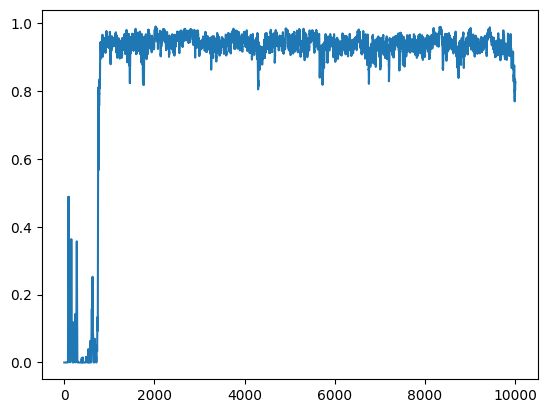

In [11]:
plt.plot(q_smooth)

In [30]:
import numpy as np
import pandas as pd

def get_transition_paths_mine(distances, time_step_ns=0.2, window_ns=10.0, 
                         q_folded=6, q_unfolded=10):

    # 1. Apply Smoothing (Running Average)
    # Convert window time to number of frames (must be odd integer ideally)
    window_frames = int(window_ns / time_step_ns)
    if window_frames < 1: 
        window_frames = 1
        
    # Use pandas for easy rolling average; center=True avoids phase shift
    q_series = pd.Series(distances)
    q_smooth = q_series.rolling(window=window_frames, center=True).mean().fillna(q_series)
    q_smooth = q_smooth.values

    # 2. Assign Stable States
    #  1 = Folded
    # -1 = Unfolded
    #  0 = Intermediate/Transition
    state_traj = np.zeros(len(q_smooth), dtype=int)
    state_traj[q_smooth < q_folded] = 1
    state_traj[q_smooth > q_unfolded] = -1

    # 3. Identify Valid Transitions
    # We only care about frames where the system is CLEARLY in a stable state.
    # We find indices of frames that are either 1 or -1.
    stable_indices = np.where(state_traj != 0)[0]
    
    if len(stable_indices) < 2:
        print("Trajectory does not visit enough stable states to identify transitions.")
        return [], q_smooth

    # Check for switches between distinct stable states
    # stable_states_sequence is the sequence of 1s and -1s visiting over time
    stable_states_sequence = state_traj[stable_indices]
    
    transitions = []
    # Iterate through the sequence of stable frames
    for k in range(len(stable_indices) - 1):
        curr_state = stable_states_sequence[k]
        next_state = stable_states_sequence[k+1]
        
        # If the state changes (e.g., 1 to -1 or -1 to 1), we found a transition block
        if curr_state != next_state:
            # The transition path is the segment between these two stable points.
            # start_idx: the LAST frame in the previous stable state
            # end_idx: the FIRST frame in the new stable state
            start_idx = stable_indices[k]
            end_idx = stable_indices[k+1]
            
            # Determine type
            t_type = "unfolding" if (curr_state == 1 and next_state == -1) else "folding"
            
            transitions.append({
                'type': t_type,
                'start_frame': start_idx,
                'end_frame': end_idx,
                'duration_ns': (end_idx - start_idx) * time_step_ns
            })

    print(f"Found {len(transitions)} valid transition paths.")
    return transitions, q_smooth

# Run Analysis
events, q_smooth = get_transition_paths_mine(distances, time_step_ns=1, window_ns=10)

for i, event in enumerate(events):
    print(f"Event {i+1}: {event['type'].upper()}")
    print(f"  Frames: {event['start_frame']} -> {event['end_frame']}")
    print(f"  Duration: {event['duration_ns']:.2f} ns")

Found 7 valid transition paths.
Event 1: FOLDING
  Frames: 62 -> 75
  Duration: 13.00 ns
Event 2: UNFOLDING
  Frames: 289 -> 315
  Duration: 26.00 ns
Event 3: FOLDING
  Frames: 376 -> 409
  Duration: 33.00 ns
Event 4: UNFOLDING
  Frames: 490 -> 510
  Duration: 20.00 ns
Event 5: FOLDING
  Frames: 526 -> 536
  Duration: 10.00 ns
Event 6: UNFOLDING
  Frames: 537 -> 542
  Duration: 5.00 ns
Event 7: FOLDING
  Frames: 590 -> 647
  Duration: 57.00 ns


FS PEPTIDE

Frames: 14000 N: 21 Unique maps: 11657


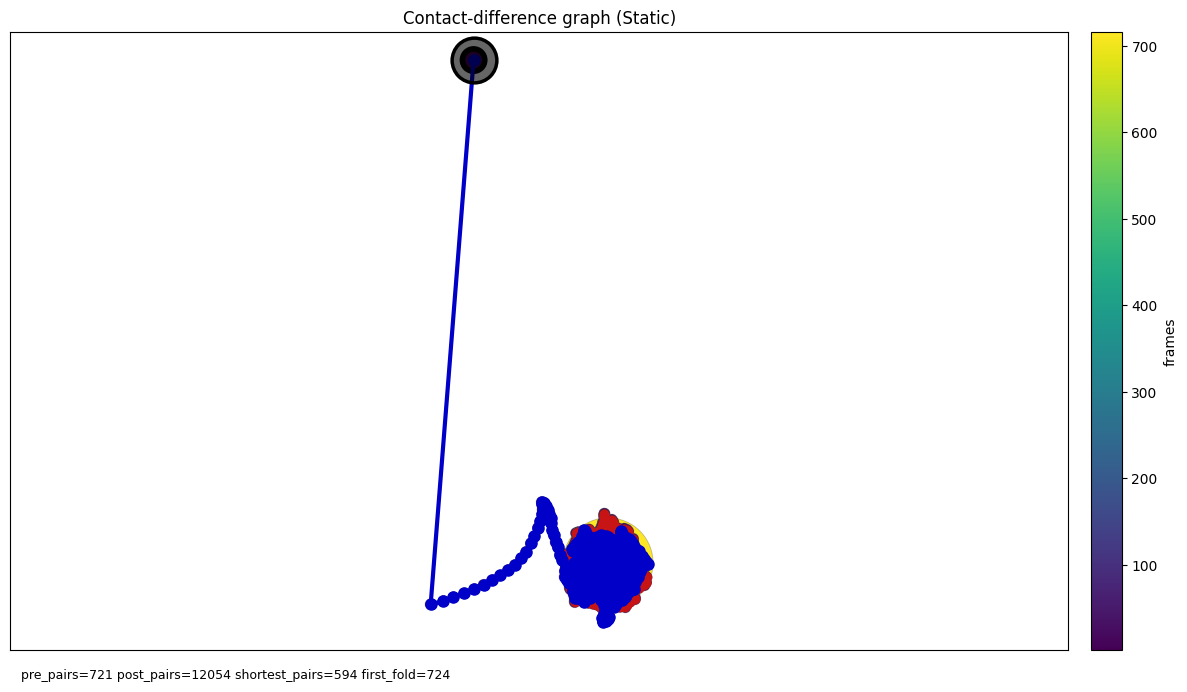

In [33]:
pdb = "/Users/kebl8116-admin/Projects/origami/data/fs-peptide/fs-peptide.pdb"
xtc = "/Users/kebl8116-admin/Projects/origami/data/fs-peptide/merged_subsampled.xtc"

contact_maps = topology.get_contact_maps(top=pdb, traj=xtc)
unique_maps, frame_to_uid, inds = topology.get_unique_maps(contact_maps)

G, counter, node_counts = graphs.build_temporal_transition_graph(frame_to_uid, inds, keep_self_loops=False)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

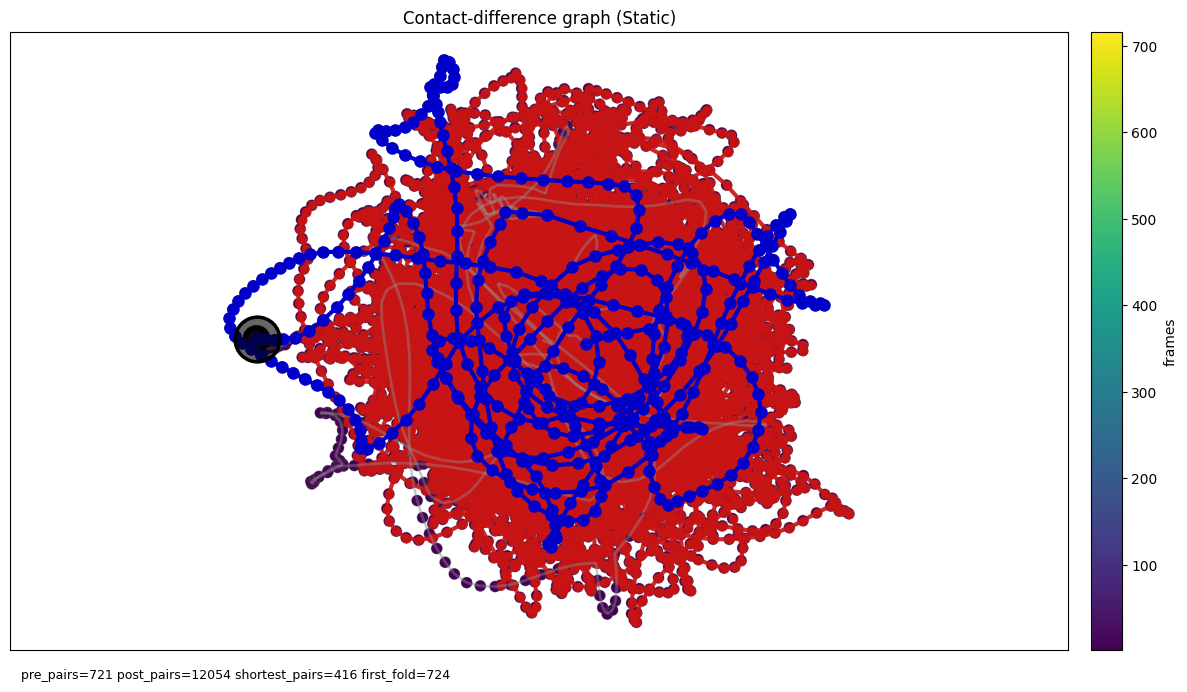

In [34]:
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/kebl8116-admin/miniconda3/envs

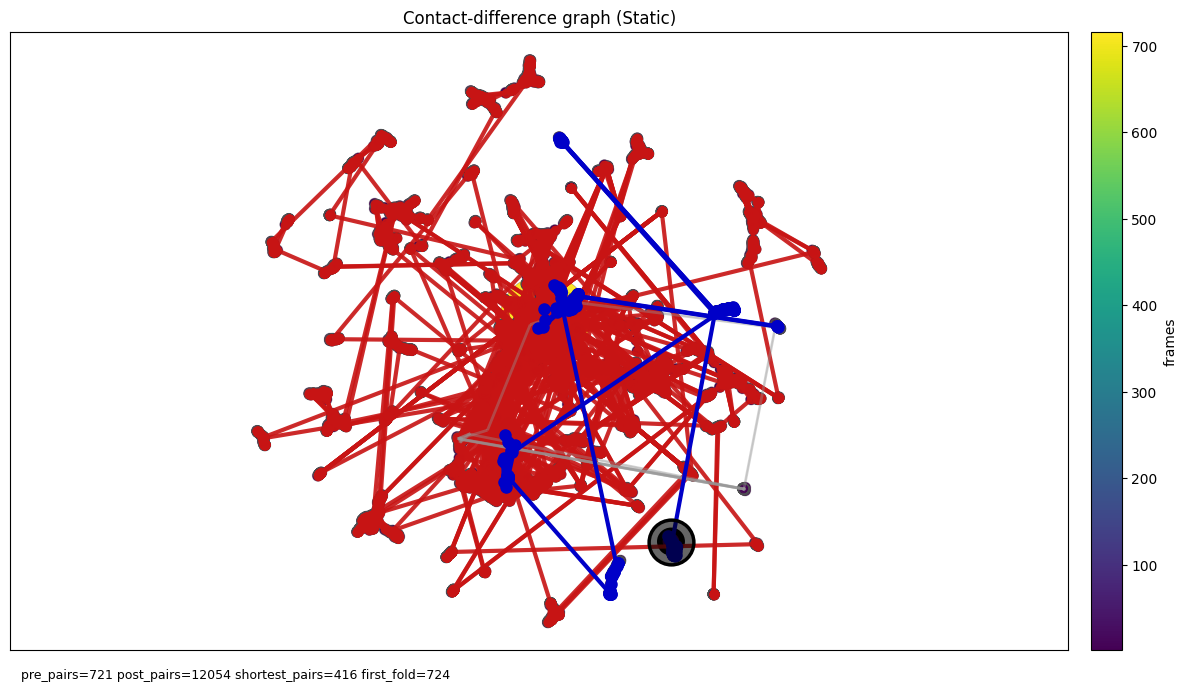

In [35]:
flat_bits, tri, Mbits = topology.flatten_upper_bits(unique_maps)
ints, Mbits, tri = topology.maps_to_upper_ints(unique_maps)
Gm, ints = graphs.build_contact_manifold_graph(ints, Mbits, method='auto')
edge_info = graphs.temporal_edge_counts(frame_to_uid, keep_self_loops=False)
G = graphs.merge_manifold_and_temporal(Gm, edge_info)
X_emb, pca = clustering.embed_flat_bits(flat_bits, pca_n=45, umap_n=2)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)

/var/folders/bd/1_0prvlx06lcc135mt668_3r0000gs/T/ipykernel_26668/516664125.py:144: UserWarning: U=11657 large: pairwise Hamming (U^2) will be expensive and memory-heavy.
  warnings.warn(f"U={U} large: pairwise Hamming (U^2) will be expensive and memory-heavy.", UserWarning)
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kebl8116-admin/miniconda3/envs/folding_graphs/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  r

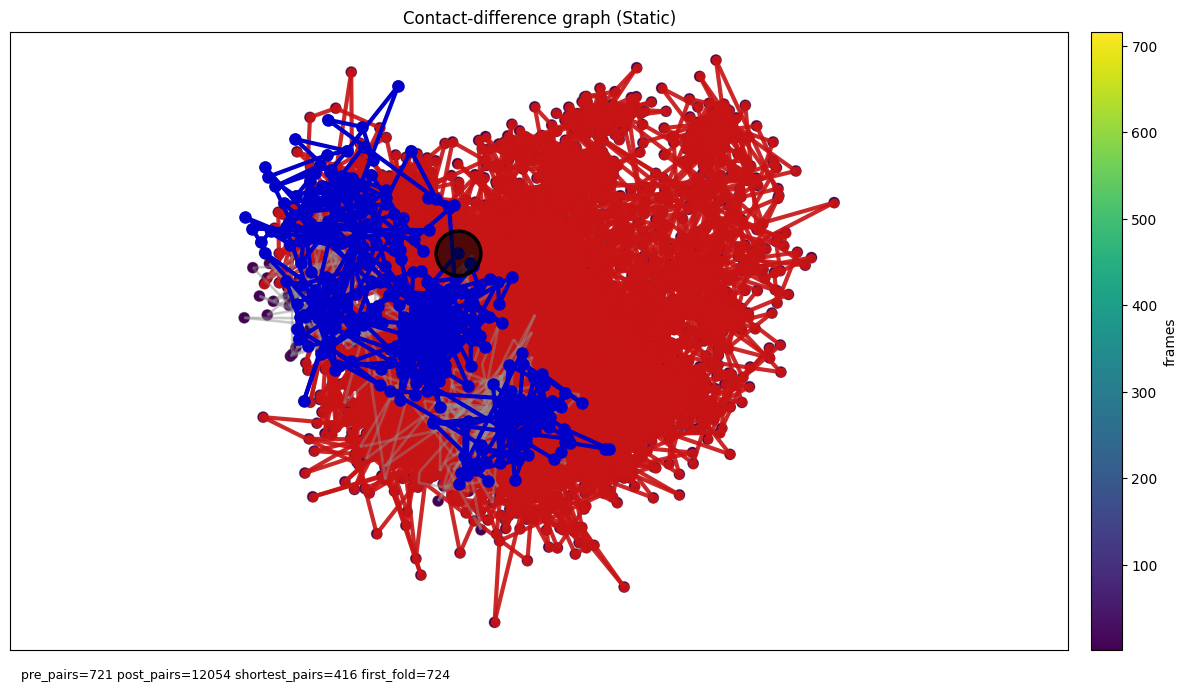

In [37]:
X_emb, labels, D = embed_and_cluster_by_hamming(ints,
                                 n_components=10,
                                 embed_method='mds',   # 'mds' or 'spectral'
                                 cluster_method='agglomerative',  # 'agglomerative' or 'hdbscan'
                                 n_clusters=None,      # only for agglomerative
                                 random_state=42,
                                 warn_threshold=4000)
pos = {i:(float(X_emb[i,0]), float(X_emb[i,1])) for i in range(X_emb.shape[0])}
fig, ax = plotting.plot_graph_auto(G, frame_to_uid, pos, X_emb, unique_maps=unique_maps, unique_indices=inds, interactive=False)